<a href="https://colab.research.google.com/github/Thomas26948/Notebooks/blob/main/mnist4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     |████████████████████████████████| 727kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 194kB 10.1MB/s 
     |████████████████████████████████| 1.1MB 15.1MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
Mounted at /content/gdrive


Using MNIST Dataset

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [7]:
(path/'valid').ls()

(#2) [Path('valid/3'),Path('valid/7')]

In [8]:
threes = (path/'train'/'3').ls().sorted()

In [9]:
sevens = (path/'train'/'7').ls().sorted()

Python Imaging Library (PIL) => Image class

In [10]:
im3_path = threes[150]
im3 = Image.open(im3_path)
im3

In [11]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 116, 195, 254, 255, 212, 255, 199,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 197, 247, 253, 253, 253, 253, 253, 253, 253, 204,  10

In [12]:
len(array(im3))

28

In [13]:
tensor(im3)[0:10,0:10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  98, 197],
        [  0,   0,   0,   0,   0,   0,   0,  35, 227, 253],
        [  0,   0,   0,   0,   0,   0,   0,   0, 130, 253],
        [  0,   0,   0,   0,   0,   0,   0,   0,  11,  20]], dtype=torch.uint8)

Pandas

In [14]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[10:29,14:35])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,238,253,253,253,104,0,0,0,0,0,0,0,0,0
1,253,253,242,85,9,0,0,0,0,0,0,0,0,0
2,253,226,22,0,0,0,0,0,0,0,0,0,0,0
3,253,128,2,0,0,0,0,0,0,0,0,0,0,0
4,253,253,179,31,0,0,0,0,0,0,0,0,0,0
5,253,253,253,213,69,0,0,0,0,0,0,0,0,0
6,45,210,212,234,220,32,0,0,0,0,0,0,0,0
7,0,0,0,33,199,165,0,0,0,0,0,0,0,0
8,0,0,0,4,190,233,0,0,0,0,0,0,0,0
9,0,0,0,137,253,233,0,0,0,0,0,0,0,0


In [15]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,238,253,253,253,104,0,0,0,0,0,0,0,0,0
1,253,253,242,85,9,0,0,0,0,0,0,0,0,0
2,253,226,22,0,0,0,0,0,0,0,0,0,0,0
3,253,128,2,0,0,0,0,0,0,0,0,0,0,0
4,253,253,179,31,0,0,0,0,0,0,0,0,0,0
5,253,253,253,213,69,0,0,0,0,0,0,0,0,0
6,45,210,212,234,220,32,0,0,0,0,0,0,0,0
7,0,0,0,33,199,165,0,0,0,0,0,0,0,0
8,0,0,0,4,190,233,0,0,0,0,0,0,0,0
9,0,0,0,137,253,233,0,0,0,0,0,0,0,0


In [16]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [17]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]


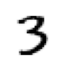

In [18]:
show_image(three_tensors[1])

In [19]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [20]:
stacked_sevens.ndim

3

In [21]:
mean7 = stacked_sevens.mean(0)
mean3 = stacked_threes.mean(0)

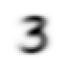

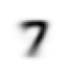

In [22]:
show_image(mean3)
show_image(mean7)

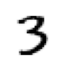

In [23]:
a_3 = stacked_threes[1]
show_image(a_3)

In [24]:
dist_3_abs = (a_3-mean3).abs().mean()
dist_3_sqr = ((a_3-mean3)**2).mean().sqrt()

dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [25]:
dist_7_abs = (a_3-mean7).abs().mean()
dist_7_sqr = ((a_3-mean7)**2).mean().sqrt()

dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

Equivalent to Pytorch function
But don't forget to take the root of mse => RMSE

In [26]:
F.l1_loss(a_3.float(),mean7),F.mse_loss(a_3.float(),mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [27]:
x=tensor([[1,2,3],[4,5,6]])
x[:,0]


tensor([1, 4])

In [28]:
(path/'valid'/'3').ls()

(#1010) [Path('valid/3/8120.png'),Path('valid/3/2450.png'),Path('valid/3/6065.png'),Path('valid/3/3407.png'),Path('valid/3/9182.png'),Path('valid/3/1683.png'),Path('valid/3/8435.png'),Path('valid/3/8254.png'),Path('valid/3/3493.png'),Path('valid/3/5293.png')...]

In [29]:
val3 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
val3 = val3.float()/255
val7 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
val7 = val7.float()/255
val3.shape

torch.Size([1010, 28, 28])

In [30]:
def is_3(x):
  return F.mse_loss(x,mean3)<F.mse_loss(x,mean7)

/usr/local/lib/python3.6/dist-packages/fastai/torch_core.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: _,ax = plt.subplots(figsize=figsize)


finb


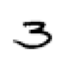

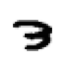

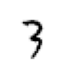

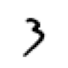

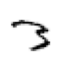

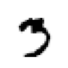

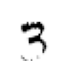

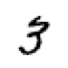

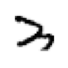

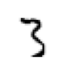

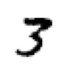

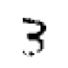

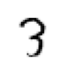

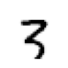

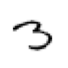

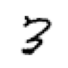

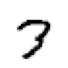

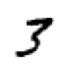

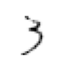

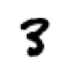

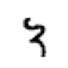

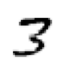

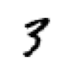

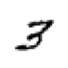

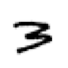

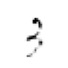

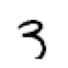

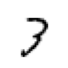

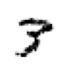

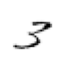

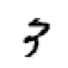

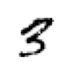

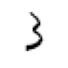

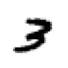

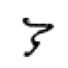

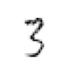

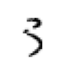

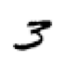

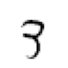

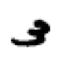

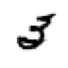

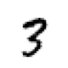

In [31]:
for i in range(len(val3)):
  if is_3(val3[i]) != True:
    show_image(val3[i])
print("finb")

In [32]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [33]:
mnist_distance(val3,mean3)

tensor([0.1314, 0.1261, 0.1778,  ..., 0.1208, 0.1247, 0.1369])

In [34]:
def is_3(x):
  return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [36]:
is_3(val3)

tensor([ True,  True,  True,  ...,  True,  True, False])

Accuracy of our model

In [40]:
accuracy_3 = is_3(val3).float().mean()
accuracy_7 = 1 - is_3(val7).float().mean()

accuracy_3,accuracy_7, (accuracy_3+accuracy_7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

**Stochastic Descent Gradient**

In [42]:
xt = tensor(3.).requires_grad_()

In [44]:
xt

tensor(3., requires_grad=True)

In [45]:
def f(x): return x**2

In [47]:
yt=f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [48]:
yt.backward()

In [53]:
tensor([1,2,3]).sum()

tensor(6)

In [60]:
torch.randn(3)

tensor([-0.7658, -0.7506,  1.3525])

In [61]:
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)

In [68]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [74]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [76]:
valid_x = torch.cat([val3,val7]).view(-1,28*28)
valid_y = tensor([1]*len(val3)+[0]*len(val7)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [77]:
def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [90]:
weights = init_params((28*28,1))

In [80]:
bias = init_params(1)

In [81]:
(train_x[0]*weights.T).sum()+bias

tensor([-13.2578], grad_fn=<AddBackward0>)

In [91]:
def linear1(xb):
  return xb@weights + bias #@ is for matrix multiplication
preds=linear1(train_x)
preds

tensor([[  0.6813],
        [  6.5813],
        [ 14.2738],
        ...,
        [-12.7016],
        [  0.4718],
        [  1.2406]], grad_fn=<AddBackward0>)

In [92]:
corrects = (preds>0.0).float()==train_y
corrects.float().mean(0).item()

0.6233462691307068

In [95]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:x is a scalar) or values selected at indices
                         

In [96]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

In [97]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [105]:
coll = range(15)
dl = DataLoader(coll, batch_size=4, shuffle=True)
list(dl)

[tensor([ 3,  7,  6, 13]),
 tensor([11,  5,  0,  1]),
 tensor([ 4, 10, 12, 14]),
 tensor([8, 9, 2])]

Summary

In [106]:
weights = init_params((28*28,1))
bias = init_params(1)

In [116]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [115]:
help(first)

Help on function first in module fastcore.basics:

first(x, f=None, negate=False, **kwargs)
    First element of `x`, optionally filtered by `f`, or None if missing



In [117]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [118]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [119]:
preds = linear1(batch)
preds

tensor([[-6.6002],
        [-3.1368],
        [-2.7656],
        [ 7.1027]], grad_fn=<AddBackward0>)

In [123]:
mnist_loss??

In [127]:
loss = mnist_loss(preds,train_y[:4])
loss.item()

0.7246604561805725

In [128]:
loss.backward()

In [129]:
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0035), tensor([-0.0244]))

In [130]:
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [135]:
weights.grad.zero_()

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [136]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0035), tensor([-0.1222]))

In [137]:
weights.grad.zero_()
bias.grad.zero_();

In [138]:
def train_epoch(model,lr,params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [139]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [140]:
batch_accuracy(linear1(batch),train_y[:4])

tensor(0.2500)

In [141]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [143]:
validate_epoch(linear1)

0.3332

In [144]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5007

In [146]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9751 0.9751 0.9751 0.9755 0.9765 0.977 0.9775 0.9775 0.977 0.9765 0.9765 0.977 0.9775 0.978 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 

In [147]:
linear_model = nn.Linear(28*28,1)

In [148]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [149]:
class BasicOptim:
  def __init__(self,params,lr):
    self.params,self.lr = list(params),lr

  def step(self,*args,**kwargs):
    for p in self.params:
      p.data -= p.grad.data*self.lr
  
  def zero_grad(self,*args,**kwargs):
    for p in self.params:
      p.grad = None

In [151]:
opt = BasicOptim(linear_model.parameters(),lr)

In [152]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

In [156]:
validate_epoch??

In [155]:
validate_epoch(linear_model)

0.5829

In [157]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end='  ')

In [158]:
train_model(linear_model, 20)

0.4932  0.7837  0.8608  0.9175  0.937  0.9482  0.9565  0.9638  0.9663  0.9673  0.9697  0.9717  0.9741  0.9746  0.9761  0.9765  0.9775  0.9775  0.9785  0.9785  

In [159]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932  0.7378  0.8569  0.9175  0.9365  0.9492  0.957  0.9638  0.9663  0.9678  0.9697  0.9721  0.9741  0.9746  0.9761  0.977  0.9775  0.9775  0.9785  0.9785  

In [160]:
dls = DataLoaders(dl,valid_dl)

In [162]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [164]:
learn.fit(20,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.016410,0.035568,0.969087,00:00
1,0.016127,0.033619,0.971541,00:00
2,0.015832,0.032020,0.973503,00:00
3,0.015546,0.030680,0.974485,00:00
4,0.015283,0.029540,0.975957,00:00
5,0.015045,0.028559,0.976448,00:00
6,0.014834,0.027710,0.977429,00:00
7,0.014644,0.026967,0.977920,00:00
8,0.014474,0.026314,0.978410,00:00
9,0.014319,0.025735,0.978410,00:00


In [167]:
torch.randn((2,2))

tensor([[-0.8353,  0.6418],
        [ 0.5524,  1.5583]])

In [165]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [168]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [169]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [171]:
list(simple_net.parameters())

[Parameter containing:
 tensor([[-0.0141,  0.0342,  0.0071,  ..., -0.0144,  0.0267, -0.0126],
         [ 0.0327,  0.0230,  0.0235,  ..., -0.0265,  0.0066,  0.0005],
         [-0.0340,  0.0276,  0.0071,  ...,  0.0175,  0.0290,  0.0352],
         ...,
         [-0.0230,  0.0205, -0.0148,  ..., -0.0293, -0.0125, -0.0123],
         [ 0.0191,  0.0168, -0.0333,  ..., -0.0104, -0.0348,  0.0285],
         [-0.0236, -0.0341,  0.0002,  ..., -0.0027,  0.0034,  0.0327]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0147,  0.0237, -0.0057, -0.0025, -0.0025,  0.0261,  0.0199,  0.0236,  0.0224, -0.0352, -0.0174,  0.0167,  0.0117, -0.0328,  0.0216, -0.0017,  0.0131,  0.0066, -0.0209,  0.0180,  0.0092,
          0.0327,  0.0321, -0.0182, -0.0046, -0.0278,  0.0137, -0.0263,  0.0191, -0.0248], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1808,  0.1165, -0.1657, -0.0168,  0.0321, -0.0453, -0.1375, -0.0617, -0.1294, -0.0409,  0.1768, -0.0809,  0.0770,  0.0086,  0.0600,  0.0892, -0.00

In [172]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.334790,0.406785,0.507360,00:00
1,0.153760,0.234468,0.798332,00:00
2,0.083976,0.115804,0.915113,00:00
3,0.054453,0.077637,0.941609,00:00
4,0.040869,0.060578,0.955839,00:00
5,0.033995,0.051149,0.964671,00:00
6,0.030090,0.045257,0.965653,00:00
7,0.027582,0.041229,0.965653,00:00
8,0.025794,0.038286,0.969087,00:00
9,0.024421,0.036023,0.970559,00:00


In [175]:
learn.recorder.values[-1]

(#3) [0.014316302724182606,0.020864922553300858,0.982826292514801]

In [176]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.104792,0.020221,0.995093,00:16
